In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
gl = pd.read_csv(r"C:\Users\svire\Downloads\glass.csv")
gl.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [3]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
gl.describe().T

count       mean       std       min        25%       50%        75%  \
RI    214.0   1.518365  0.003037   1.51115   1.516522   1.51768   1.519157   
Na    214.0  13.407850  0.816604  10.73000  12.907500  13.30000  13.825000   
Mg    214.0   2.684533  1.442408   0.00000   2.115000   3.48000   3.600000   
Al    214.0   1.444907  0.499270   0.29000   1.190000   1.36000   1.630000   
Si    214.0  72.650935  0.774546  69.81000  72.280000  72.79000  73.087500   
K     214.0   0.497056  0.652192   0.00000   0.122500   0.55500   0.610000   
Ca    214.0   8.956963  1.423153   5.43000   8.240000   8.60000   9.172500   
Ba    214.0   0.175047  0.497219   0.00000   0.000000   0.00000   0.000000   
Fe    214.0   0.057009  0.097439   0.00000   0.000000   0.00000   0.100000   
Type  214.0   2.780374  2.103739   1.00000   1.000000   2.00000   3.000000   

           max  
RI     1.53393  
Na    17.38000  
Mg     4.49000  
Al     3.50000  
Si    75.41000  
K      6.21000  
Ca    16.19000  
Ba     3.15000  
Fe     0.51000  
Type   7.00000

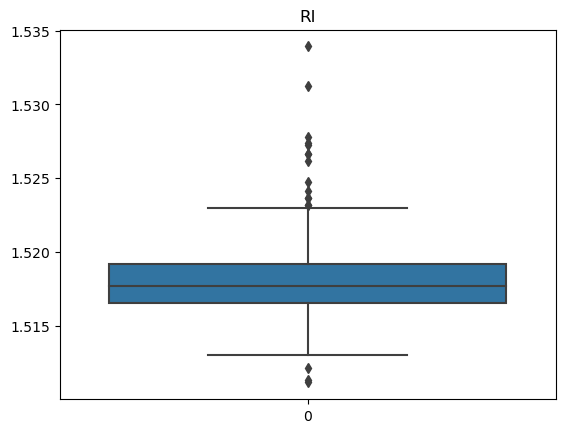

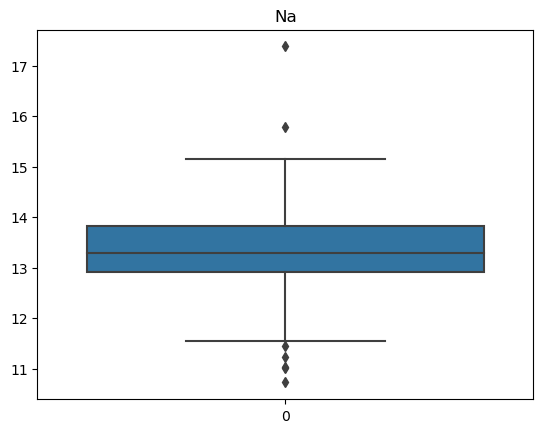

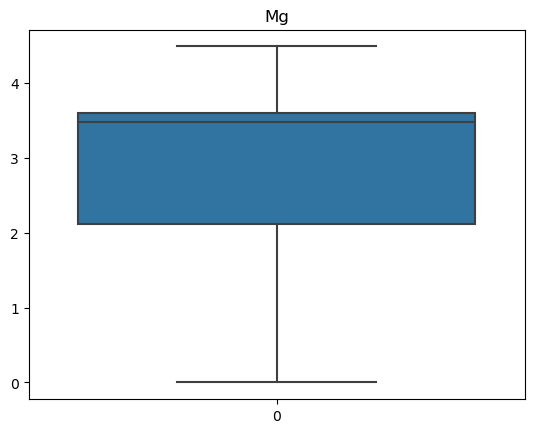

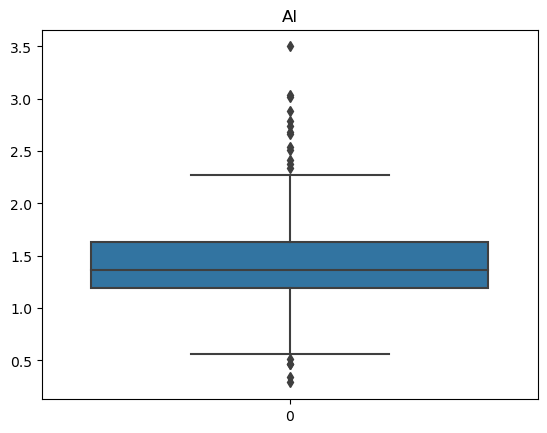

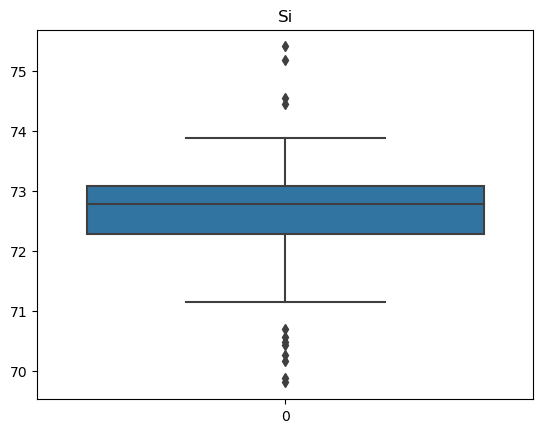

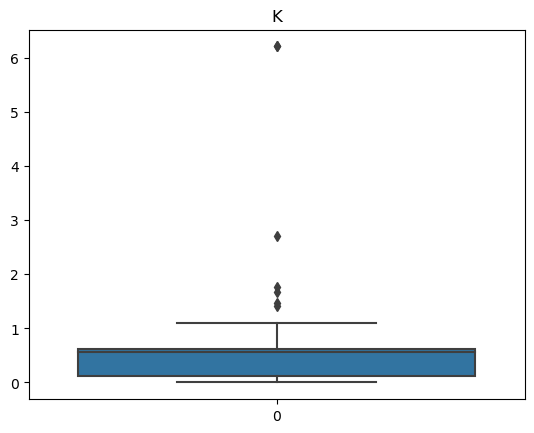

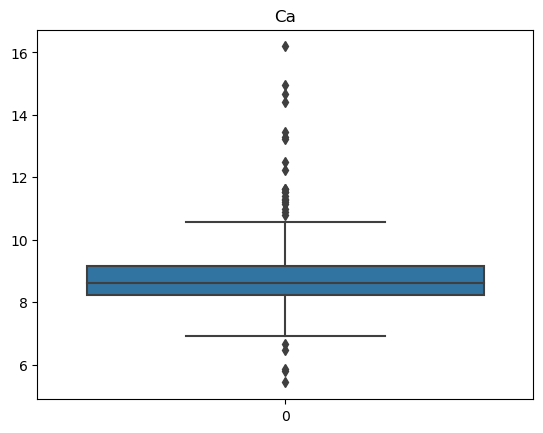

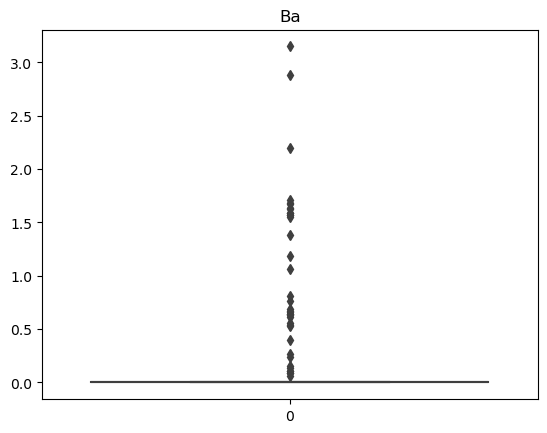

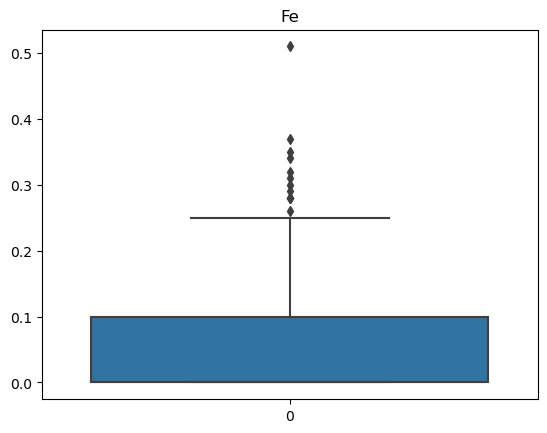

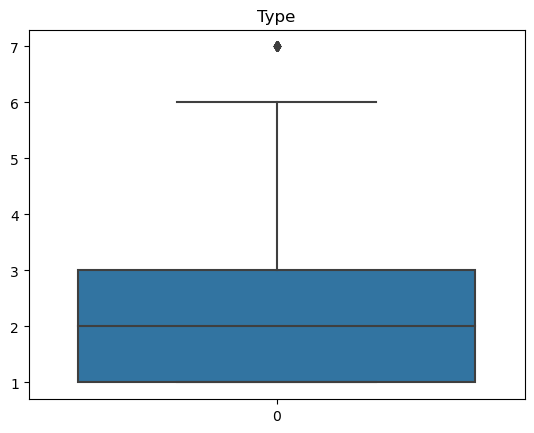

In [5]:
for i in gl.columns:
    sns.boxplot(gl[i])
    plt.title(i)
    plt.show()

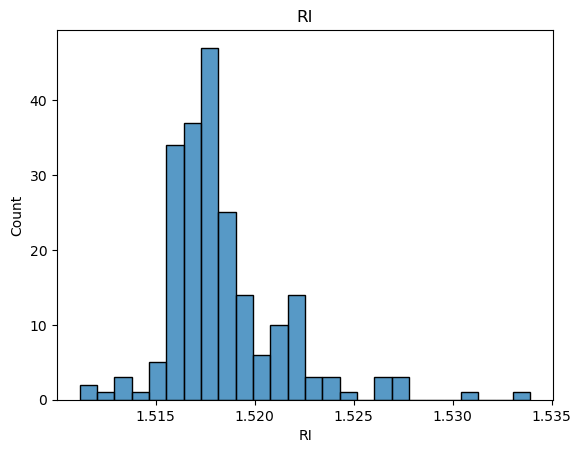

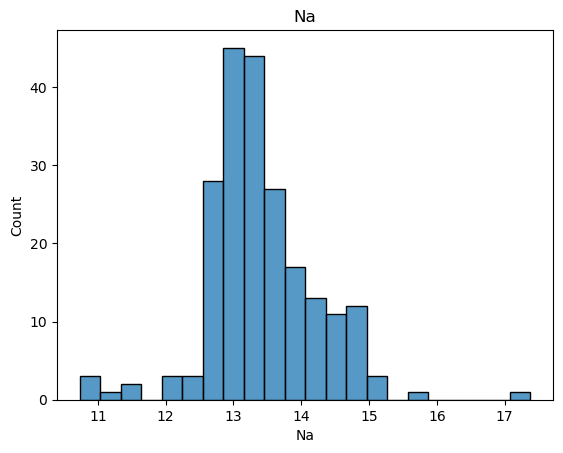

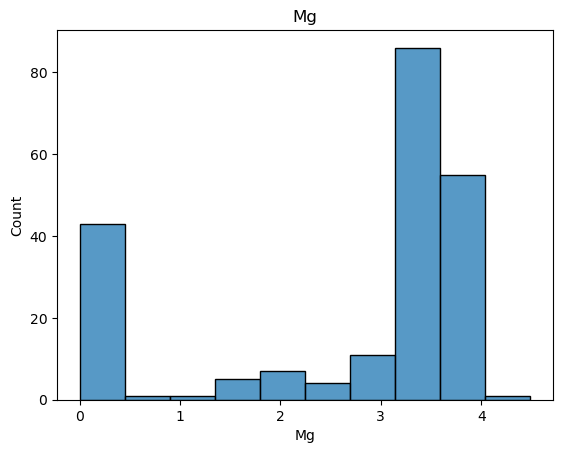

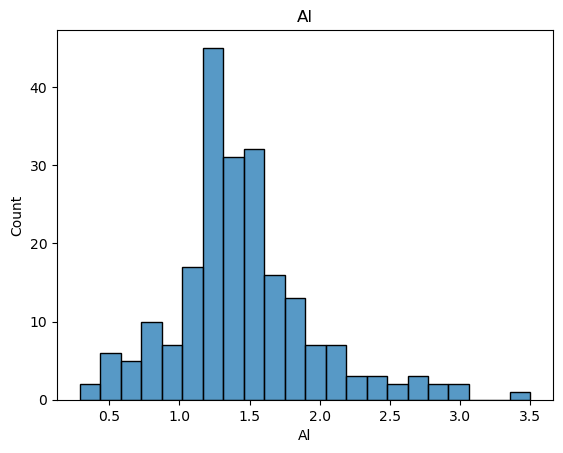

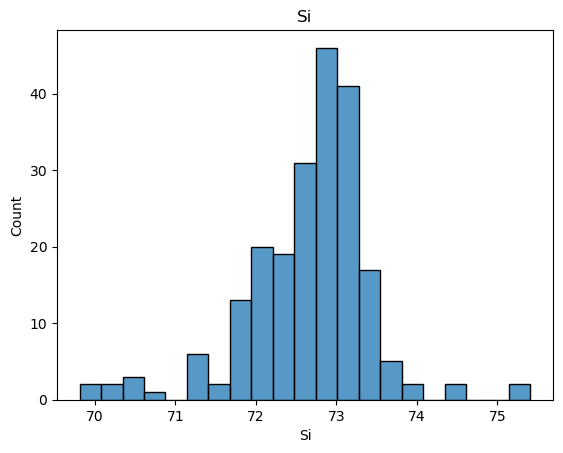

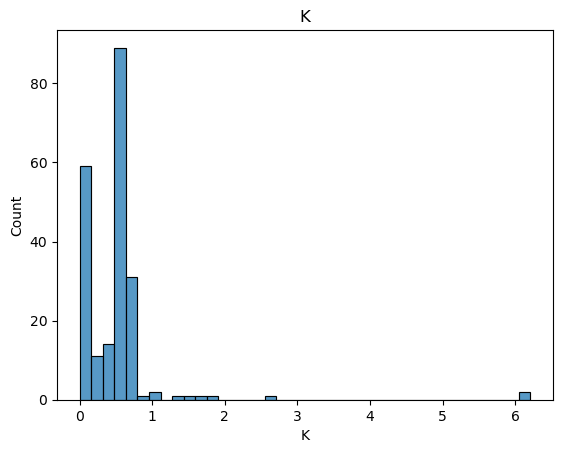

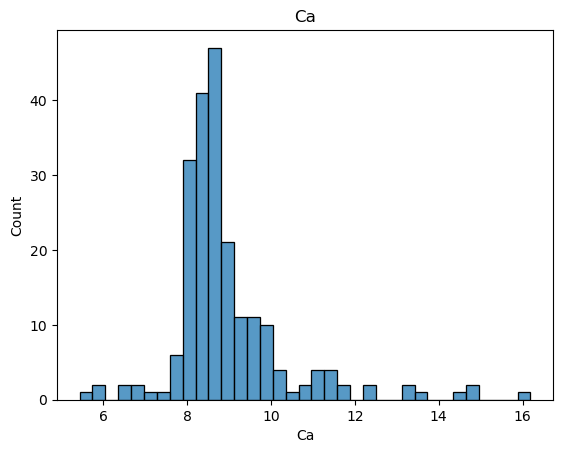

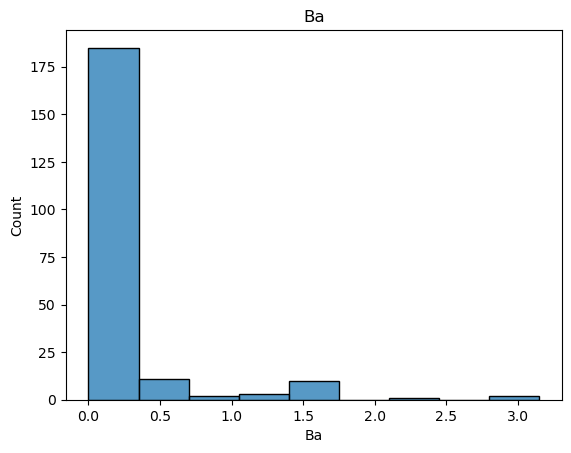

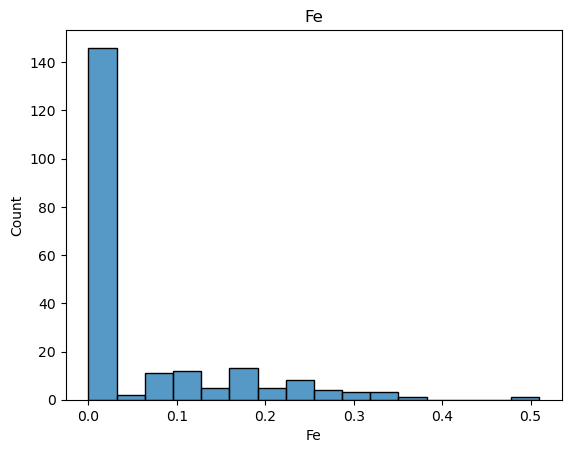

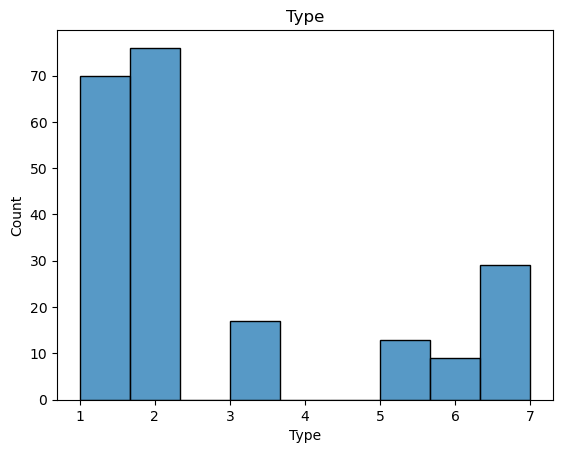

In [6]:
for i in gl.columns:
    sns.histplot(gl[i])
    plt.title(i)
    plt.show()

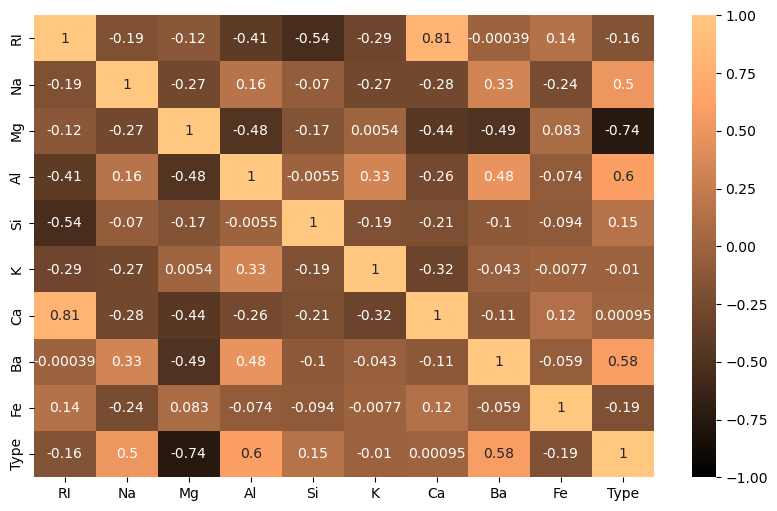

In [7]:
plt.figure(figsize = (10,6))
sns.heatmap(gl.corr(),annot = True ,vmin = -1,vmax = 1,cmap = 'copper')
plt.show()

In [8]:
X = gl.drop(labels= "Type" , axis = 1)
y = gl["Type"]
X.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0

In [9]:
y.value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [10]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().T

count          mean       std       min       25%       50%       75%  \
RI  214.0 -2.877034e-14  1.002345 -2.381516 -0.608273 -0.226229  0.261433   
Na  214.0  2.191393e-15  1.002345 -3.286943 -0.614158 -0.132382  0.512033   
Mg  214.0 -1.328117e-16  1.002345 -1.865511 -0.395774  0.552779  0.636168   
Al  214.0 -2.988264e-16  1.002345 -2.318616 -0.511756 -0.170460  0.371598   
Si  214.0  9.525091e-16  1.002345 -3.676472 -0.480029  0.179965  0.564962   
K   214.0  3.527811e-17  1.002345 -0.763919 -0.575650  0.089053  0.173582   
Ca  214.0 -3.154278e-16  1.002345 -2.484084 -0.504966 -0.251413  0.151806   
Ba  214.0 -6.640586e-17  1.002345 -0.352877 -0.352877 -0.352877 -0.352877   
Fe  214.0 -3.735330e-17  1.002345 -0.586451 -0.586451 -0.586451  0.442242   

         max  
RI  5.137232  
Na  4.875637  
Mg  1.254639  
Al  4.125851  
Si  3.570524  
K   8.780145  
Ca  5.094318  
Ba  5.997210  
Fe  4.659881

In [11]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [12]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [13]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
predicted_train_labels = NNH.predict(X_train)
accuracy_score(y_train,predicted_train_labels)

1.0

In [16]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7538461538461538

In [17]:
accuracy_score(y_test,predicted_labels)

0.7538461538461538

In [18]:
scores =[]
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

In [19]:
scores

[0.7692307692307693,
 0.7692307692307693,
 0.7538461538461538,
 0.7384615384615385,
 0.7538461538461538,
 0.7384615384615385,
 0.7384615384615385,
 0.7384615384615385,
 0.7384615384615385,
 0.7384615384615385,
 0.7384615384615385,
 0.7538461538461538,
 0.7384615384615385,
 0.7230769230769231]

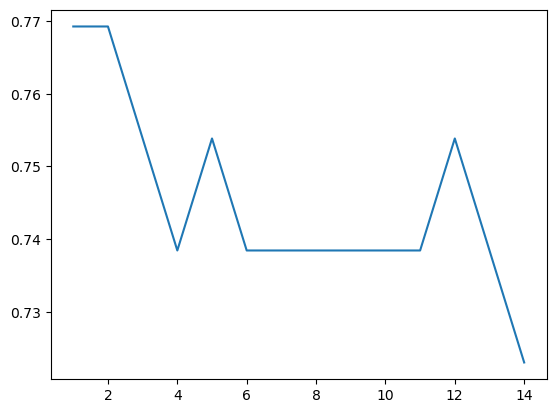

In [20]:
plt.plot(range(1,15),scores)

In [21]:
scores =[]
for k in range(1,15):
    NNH1 = KNeighborsClassifier(n_neighbors = k, weights = 'uniform' )
    NNH1.fit(X_train, y_train)
    scores.append(NNH1.score(X_test, y_test))

In [22]:
scores

[0.7692307692307693,
 0.7384615384615385,
 0.7384615384615385,
 0.7076923076923077,
 0.7384615384615385,
 0.7076923076923077,
 0.7230769230769231,
 0.7230769230769231,
 0.7384615384615385,
 0.7538461538461538,
 0.7538461538461538,
 0.7384615384615385,
 0.7076923076923077,
 0.7076923076923077]

In [23]:
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, y_train)
knn_prediction = knn_clf.predict(X_test)
knn_train_pred = knn_clf.predict(X_train)

print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_train_pred, y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_prediction, y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(knn_prediction, y_test))
print(classification_report(knn_prediction, y_test))

Accuracy 77.18%
Accuracy 73.85%
[[20  2  5  0  0  0]
 [ 4 17  2  0  0  1]
 [ 1  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  2  0  0  1  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.80      0.74      0.77        27
           2       0.81      0.71      0.76        24
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

    accuracy                           0.74        65
   macro avg       0.75      0.63      0.66        65
weighted avg       0.82      0.74      0.77        65



# KNN For Zoo Data Set

In [24]:
zo = pd.read_csv(r"C:\Users\svire\Downloads\Zoo.csv")
zo.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

In [25]:
zo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [26]:
zo['animal name'].value_counts()

animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

In [27]:
zo['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
zo['animal name'] = le.fit_transform(zo['animal name'])

In [30]:
zo.head()

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0            0     1         0     0     1         0        0         1   
1            1     1         0     0     1         0        0         0   
2            2     0         0     1     0         0        1         1   
3            3     1         0     0     1         0        0         1   
4            4     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1

In [31]:
zo['animal name'].value_counts()

animal name
25    2
64    1
74    1
73    1
72    1
     ..
31    1
30    1
29    1
28    1
99    1
Name: count, Length: 100, dtype: int64

In [32]:
X = zo.drop(['animal name'],axis = 1)
y = zo['animal name']

In [33]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().T

count          mean       std       min       25%       50%  \
hair      101.0  6.595384e-17  1.004988 -0.861034 -0.861034 -0.861034   
feathers  101.0  1.758769e-17  1.004988 -0.496904 -0.496904 -0.496904   
eggs      101.0  1.121215e-16  1.004988 -1.185227 -1.185227  0.843721   
milk      101.0 -4.616769e-17  1.004988 -0.826640 -0.826640 -0.826640   
airborne  101.0  2.198461e-18  1.004988 -0.558291 -0.558291 -0.558291   
aquatic   101.0  4.836615e-17  1.004988 -0.744208 -0.744208 -0.744208   
predator  101.0 -1.758769e-16  1.004988 -1.115547 -1.115547  0.896421   
toothed   101.0  6.595384e-17  1.004988 -1.234909 -1.234909  0.809776   
backbone  101.0  7.474769e-17  1.004988 -2.147350  0.465690  0.465690   
breathes  101.0 -1.121215e-16  1.004988 -1.951800  0.512348  0.512348   
venomous  101.0 -3.297692e-18  1.004988 -0.293294 -0.293294 -0.293294   
fins      101.0 -3.407615e-17  1.004988 -0.449868 -0.449868 -0.449868   
legs      101.0  1.066254e-16  1.004988 -1.404435 -0.415948  0.572540   
tail      101.0 -6.925154e-17  1.004988 -1.698416 -1.698416  0.588784   
domestic  101.0 -3.407615e-17  1.004988 -0.384353 -0.384353 -0.384353   
catsize   101.0  8.134307e-17  1.004988 -0.878595 -0.878595 -0.878595   
type      101.0  5.111423e-17  1.004988 -0.875451 -0.875451 -0.397502   

               75%       max  
hair      1.161395  1.161395  
feathers -0.496904  2.012461  
eggs      0.843721  0.843721  
milk      1.209717  1.209717  
airborne -0.558291  1.791182  
aquatic   1.343710  1.343710  
predator  0.896421  0.896421  
toothed   0.809776  0.809776  
backbone  0.465690  0.465690  
breathes  0.512348  0.512348  
venomous -0.293294  3.409545  
fins     -0.449868  2.222876  
legs      0.572540  2.549514  
tail      0.588784  0.588784  
domestic -0.384353  2.601775  
catsize   1.138180  1.138180  
type      0.558396  1.992242

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [36]:
predicted_train = knn.predict(X_train)
accuracy_score(y_train,predicted_train)

0.6865671641791045

In [37]:
predict_test = knn.predict(X_test)
accuracy_score(y_test,predict_test)

0.029411764705882353

In [38]:
X = zo.drop(['type'],axis = 1)
y = zo['type']

In [39]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().T

count          mean       std       min       25%       50%  \
animal name  101.0  7.474769e-17  1.004988 -1.708840 -0.841539 -0.008931   
hair         101.0  6.595384e-17  1.004988 -0.861034 -0.861034 -0.861034   
feathers     101.0  1.758769e-17  1.004988 -0.496904 -0.496904 -0.496904   
eggs         101.0  1.121215e-16  1.004988 -1.185227 -1.185227  0.843721   
milk         101.0 -4.616769e-17  1.004988 -0.826640 -0.826640 -0.826640   
airborne     101.0  2.198461e-18  1.004988 -0.558291 -0.558291 -0.558291   
aquatic      101.0  4.836615e-17  1.004988 -0.744208 -0.744208 -0.744208   
predator     101.0 -1.758769e-16  1.004988 -1.115547 -1.115547  0.896421   
toothed      101.0  6.595384e-17  1.004988 -1.234909 -1.234909  0.809776   
backbone     101.0  7.474769e-17  1.004988 -2.147350  0.465690  0.465690   
breathes     101.0 -1.121215e-16  1.004988 -1.951800  0.512348  0.512348   
venomous     101.0 -3.297692e-18  1.004988 -0.293294 -0.293294 -0.293294   
fins         101.0 -3.407615e-17  1.004988 -0.449868 -0.449868 -0.449868   
legs         101.0  1.066254e-16  1.004988 -1.404435 -0.415948  0.572540   
tail         101.0 -6.925154e-17  1.004988 -1.698416 -1.698416  0.588784   
domestic     101.0 -3.407615e-17  1.004988 -0.384353 -0.384353 -0.384353   
catsize      101.0  8.134307e-17  1.004988 -0.878595 -0.878595 -0.878595   

                  75%       max  
animal name  0.858370  1.725671  
hair         1.161395  1.161395  
feathers    -0.496904  2.012461  
eggs         0.843721  0.843721  
milk         1.209717  1.209717  
airborne    -0.558291  1.791182  
aquatic      1.343710  1.343710  
predator     0.896421  0.896421  
toothed      0.809776  0.809776  
backbone     0.465690  0.465690  
breathes     0.512348  0.512348  
venomous    -0.293294  3.409545  
fins        -0.449868  2.222876  
legs         0.572540  2.549514  
tail         0.588784  0.588784  
domestic    -0.384353  2.601775  
catsize      1.138180  1.138180

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
knn1 = KNeighborsClassifier(n_neighbors= 5, weights = 'distance',leaf_size= 10 )
knn1.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, weights='distance')

In [42]:
predicted_train = knn1.predict(X_train)
accuracy_score(y_train,predicted_train)

1.0

In [43]:
predicted_test = knn1.predict(X_test)
accuracy_score(y_test,predicted_test)

0.5294117647058824